*The Sparks Foundation : Data Science & Business Analytics Internship*

*TASK 2 : Prediction Using Unsupervised Machine Learning From given Iris dataset, to predict optimum number of clusters.*

Author: BABLU PRASAD

###Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##loading iris dataset

In [2]:
# Load the iris dataset
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head() # See the first 5 row

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# To know number of rows and collumns
df.shape

(150, 4)

In [4]:
# To find if any null value is present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
# To see summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


###Feature engineering

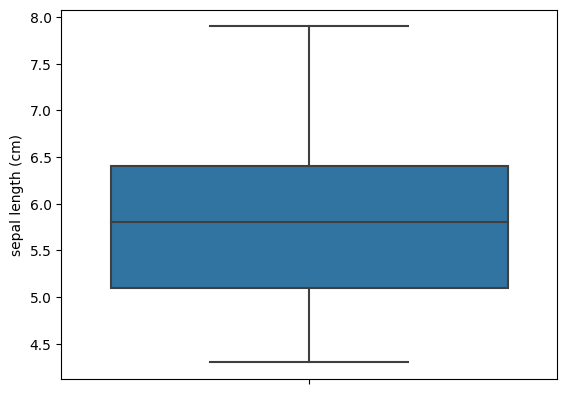

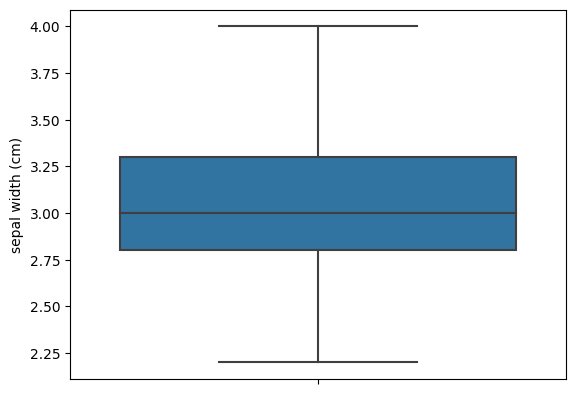

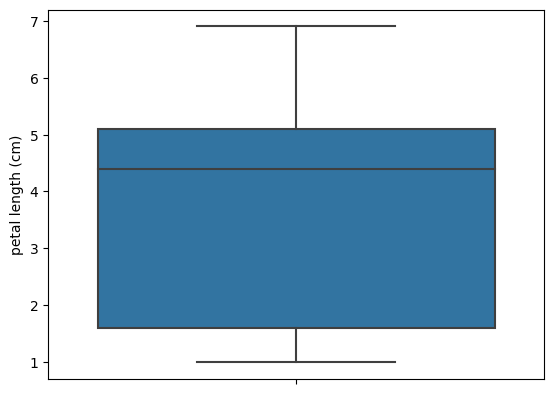

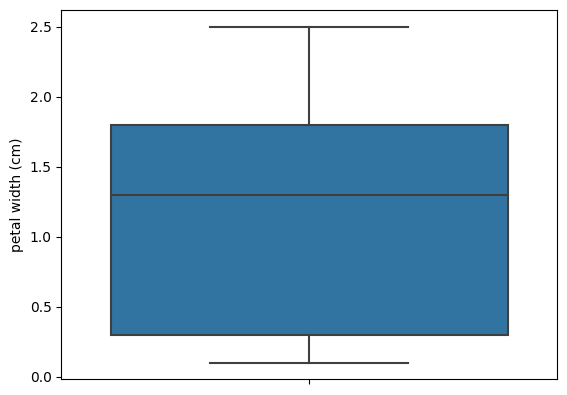

In [34]:
# To find outliers
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

*   From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'


In [13]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 4)

* We can see that after outlier treatment the number of roes are reduced to 146 from 150

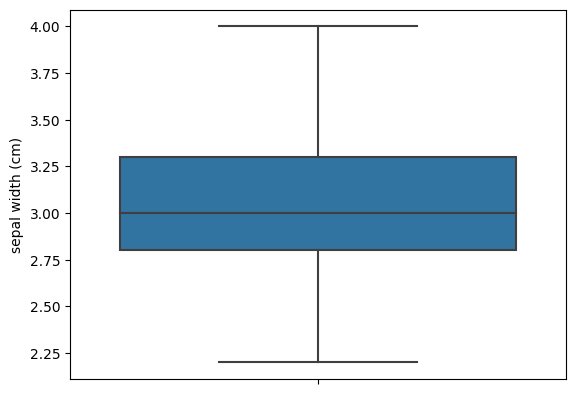

In [14]:
# Block plot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

#####SCATTERPLOTS

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

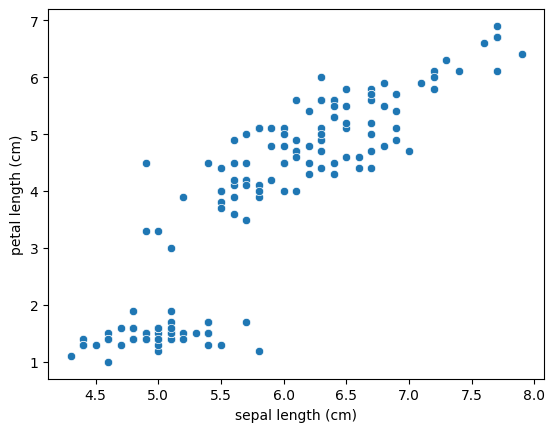

In [36]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df)

<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>

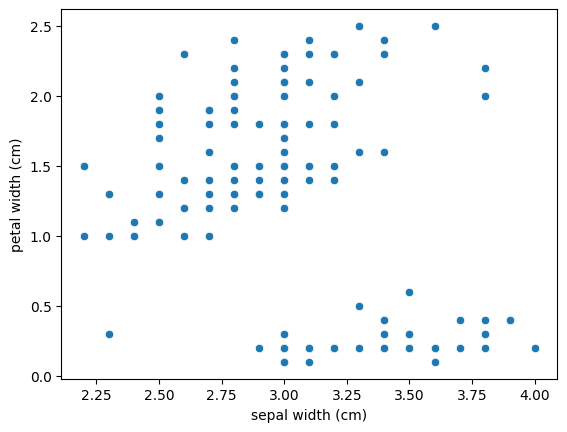

In [37]:
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', data=df)

In [29]:
#Saving all independent value in one variable
x = df.iloc[:,0:4].values

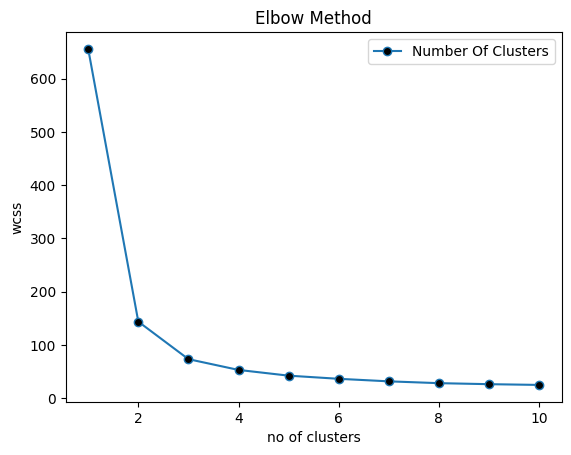

In [30]:
##ploting elbow curve to find the no. of cluster
from sklearn.cluster import KMeans
wcss=[]  ## WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

#Elbow Method- to find value of k
plt.plot(range(1,11),wcss , marker='o' ,  markerfacecolor='black')
plt.title('Elbow Method')
plt.xlabel('no of clusters')
labels = ["Number Of Clusters" , "Wcss"]
plt.ylabel('wcss')  # Within cluster sum of squares   #wcss is low for higher no. of clusters
plt.legend(labels=labels)
plt.show()

###Modeling

* From the above elbow curve we can say that '3' is the optimal number of cluster

In [31]:
# Creating object of the model and fitting it
#Clustering
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [32]:
kmeans.cluster_centers_ 

array([[5.91639344, 2.76065574, 4.40819672, 1.44098361],
       [4.97659574, 3.37659574, 1.46170213, 0.24680851],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

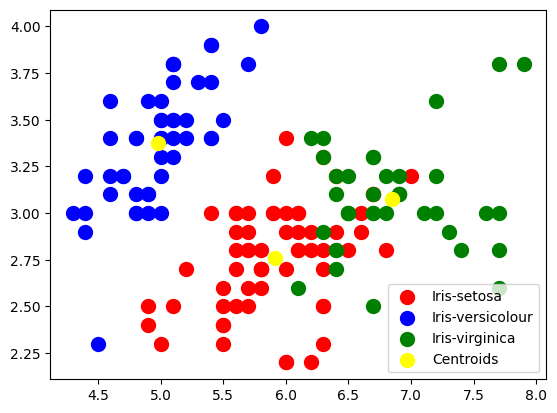

In [33]:
# Visualising the clusters - On the first two columns
plt.scatter(x[identified_clusters  == 0, 0], x[identified_clusters  == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[identified_clusters  == 1, 0], x[identified_clusters  == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[identified_clusters  == 2, 0], x[identified_clusters  == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

SUMMARY: Therefore, for given dataset, by K means clustering method , we have predicted that the number of clusters will be three and same is represented visually by matplotlib function.